In [4]:
ls -lt ../sfa*

-rw-r--r--@ 1 nishyahscott  staff  12574136 Dec 12  2023 ../sfa2122.csv
-rw-r--r--@ 1 nishyahscott  staff  12030957 Aug 23  2022 ../sfa2021.csv


In [1]:
import pandas as pd
outcomes = pd.read_csv('Most-Recent-Cohorts-Field-of-Study.csv') # outcomes
financial_aid = pd.read_csv('../sfa2122.csv') # Financial aid data 2022
institutions = pd.read_csv('hd2022.csv', encoding='cp1252') # institutions

merged_1 = pd.merge(financial_aid, institutions, on = 'UNITID')

merged_2 = pd.merge(merged_1, outcomes, on = 'UNITID')

merged_2 = merged_2[merged_2['CARNEGIE']>=0]

## Datasets

In [6]:
financial_aid.head()

,UNITID,XSCUGRAD,SCUGRAD,XSCUGDGSK,SCUGDGSK,XSCUGNDGS,SCUGNDGS,XSCUGFFN,SCUGFFN,XSCUGFFP,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,100654,R,5107,R,5094,R,13,R,1417,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,100663,R,13547,R,13284,R,263,R,2361,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
2,100690,R,251,R,251,R,0,R,0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
3,100706,R,7569,R,7360,R,209,R,1191,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
4,100724,R,3499,R,3495,R,4,R,797,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN


(20.0, 55.0)

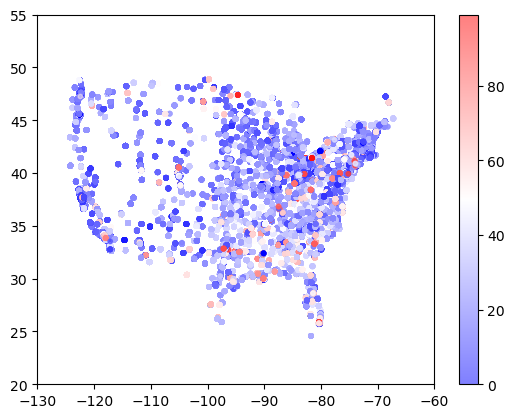

In [7]:
from matplotlib import pyplot as plt 
plt.scatter(merged_2['LONGITUD'], merged_2['LATITUDE'], c=merged_2['UPGRNTP'], \
            s=10, alpha=0.5, cmap='bwr')
plt.colorbar()
plt.xlim(-130, -60)
plt.ylim(20, 55)

Text(0, 0.5, 'Number of institutions')

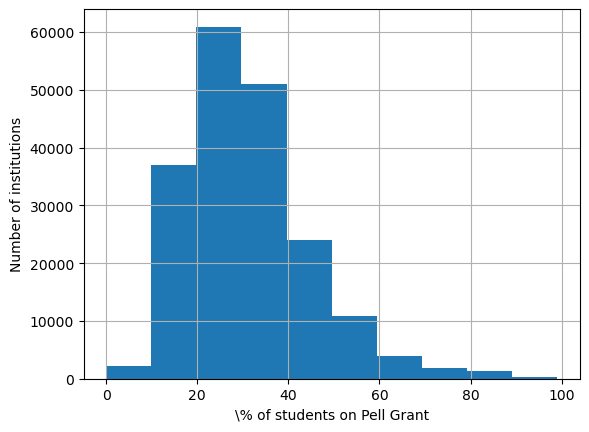

In [8]:
merged_2['UPGRNTP'].hist()
plt.xlabel('\% of students on Pell Grant')
plt.ylabel('Number of institutions')

## Comp Sci Major only

In [9]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)== 4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

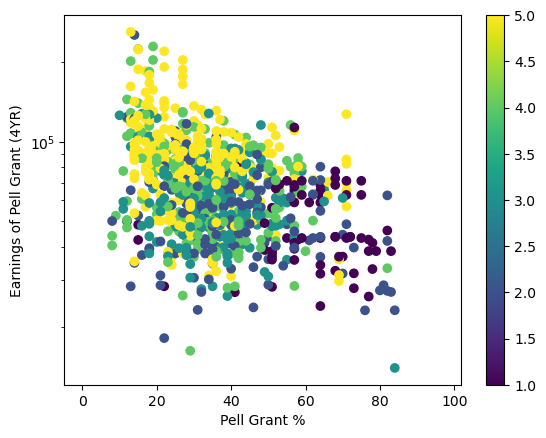

In [10]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (4YR)')
plt.yscale('log')
plt.colorbar()

In [11]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']

y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

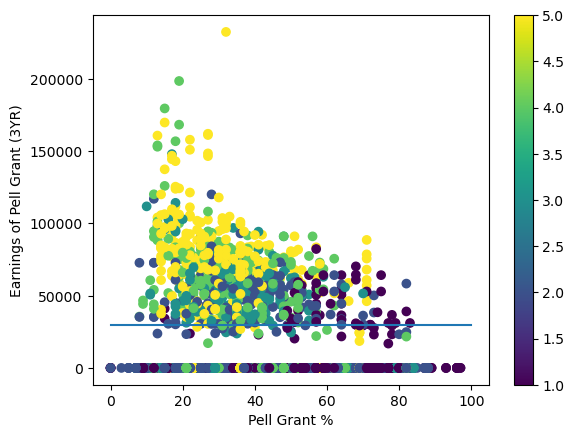

In [12]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (3YR)')
plt.plot((0, 100), (30000, 30000))
# plt.yscale('log')
plt.colorbar()

In [13]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

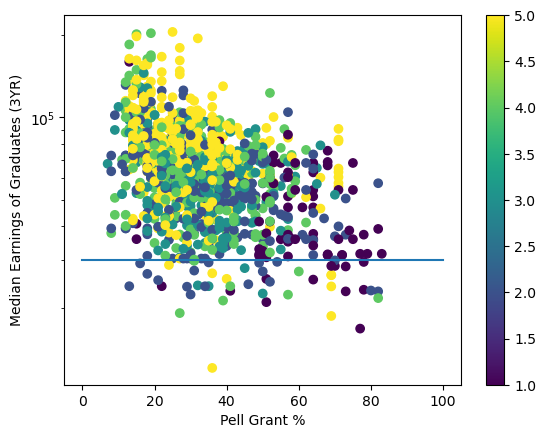

In [14]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [15]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

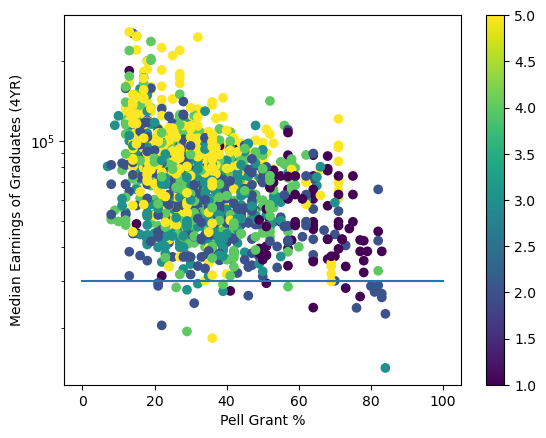

In [16]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [17]:
condition = condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

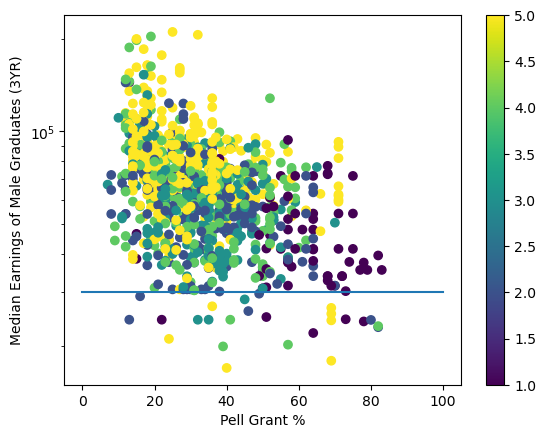

In [18]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [19]:
condition = condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

In [20]:
tmp = pd.DataFrame()
tmp['earnings'] = merged_2['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)
tmp['pell_%'] = merged_2['UPGRNTP']
tmp['cs'] = condition

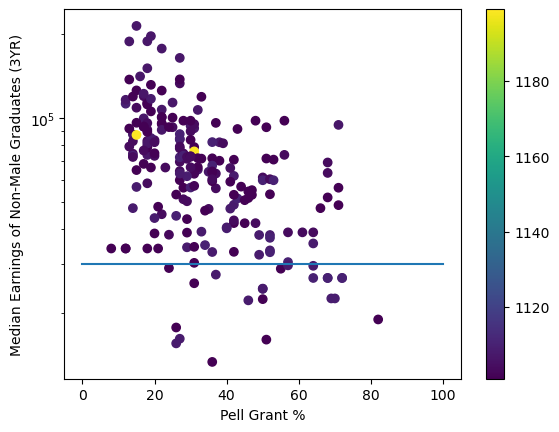

In [21]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

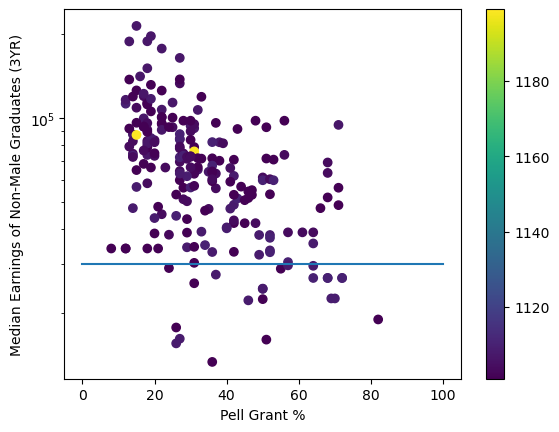

In [22]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [23]:
condition = condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

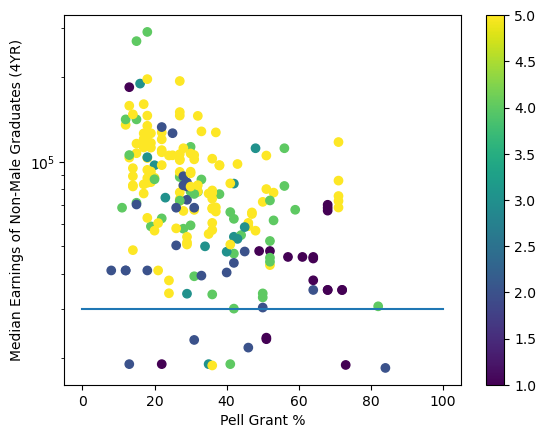

In [24]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Southeast

In [25]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
majors = majors[majors['EARN_PELL_WNE_MDN_4YR'] != 'PS']
majors['EARN_PELL_WNE_MDN_4YR'] = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR']#.replace('PS', 0).astype(int)

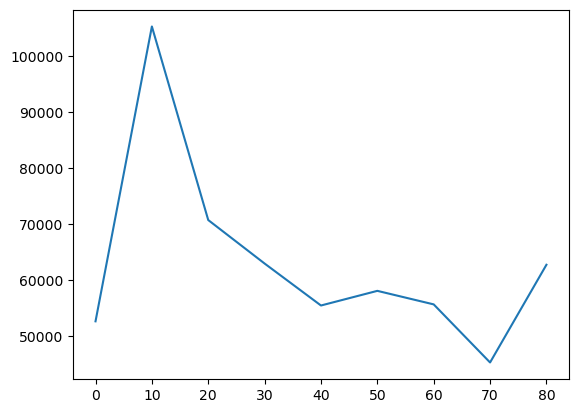

In [26]:
majors['pct'] = ((majors['UPGRNTP']/10).astype(int))*10
plt.plot(majors.groupby('pct')['EARN_PELL_WNE_MDN_4YR'].mean())



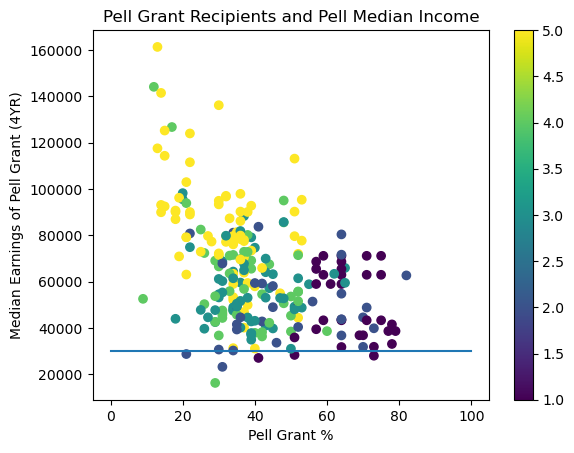

In [27]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
# plt.yscale('log')
plt.colorbar()

In [28]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

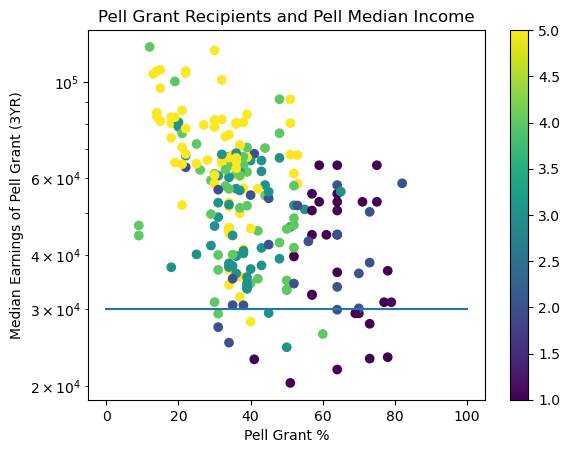

In [29]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [30]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

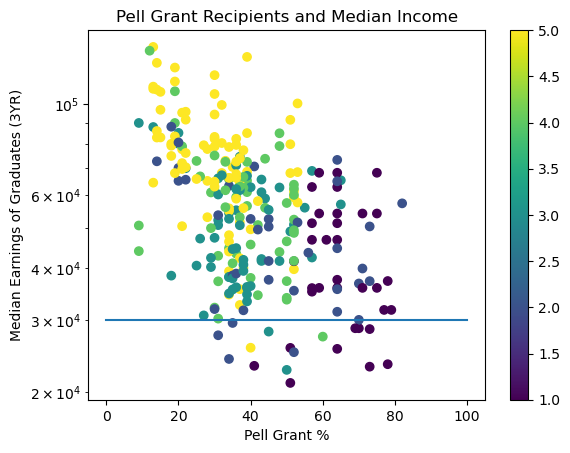

In [31]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [32]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

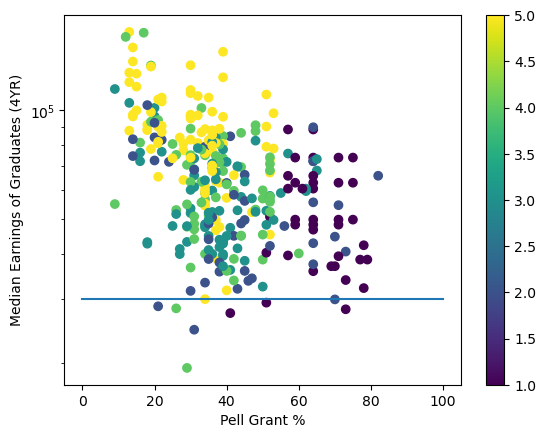

In [33]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [34]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

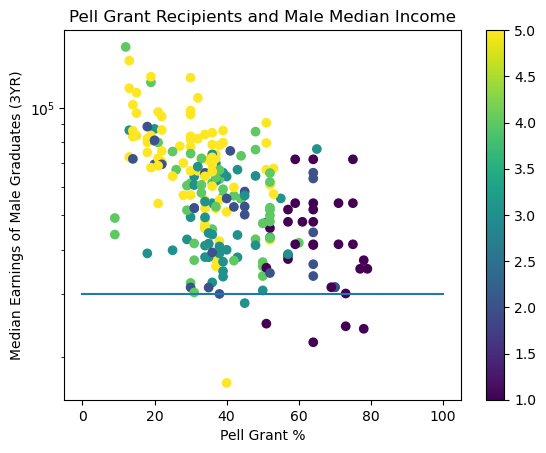

In [35]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [36]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

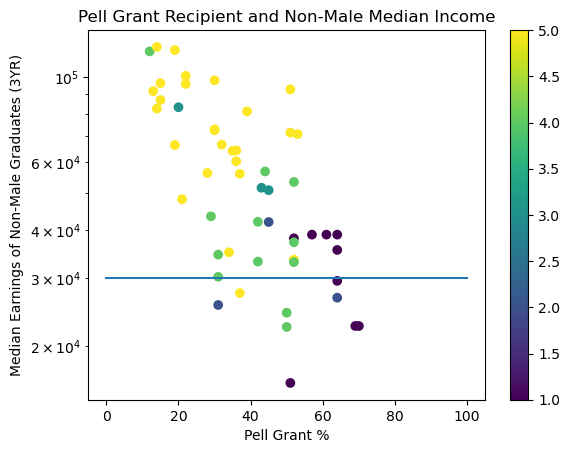

In [37]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipient and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [38]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

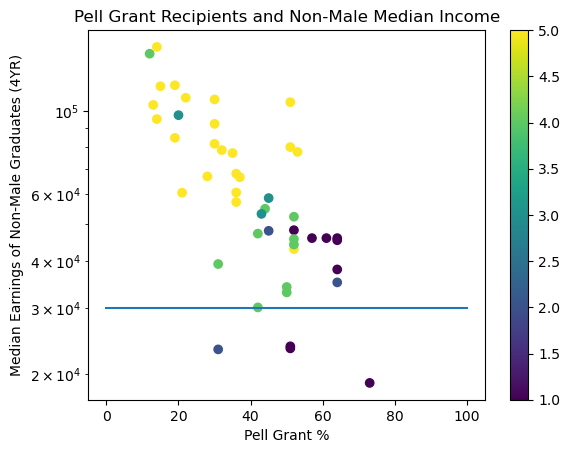

In [39]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Far West

In [40]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AK', 'CA', 'HI', 'NV', 'OR', 'WA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

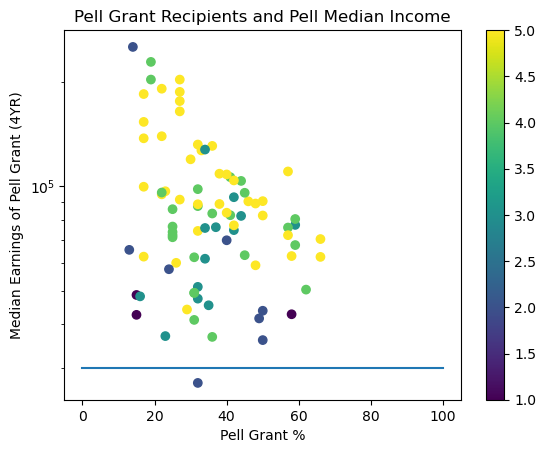

In [41]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [42]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AK', 'CA', 'HI', 'NV', 'OR', 'WA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

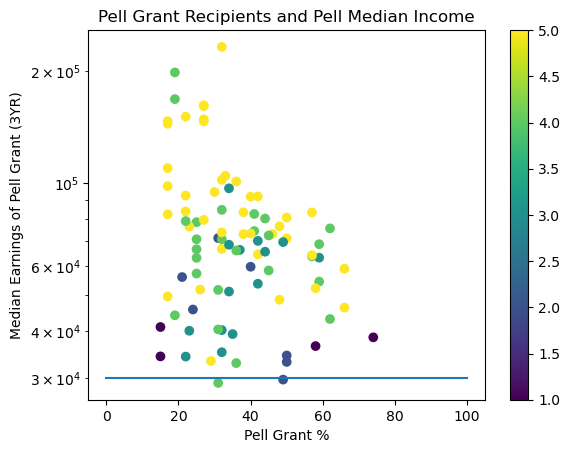

In [43]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [44]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AK', 'CA', 'HI', 'NV', 'OR', 'WA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

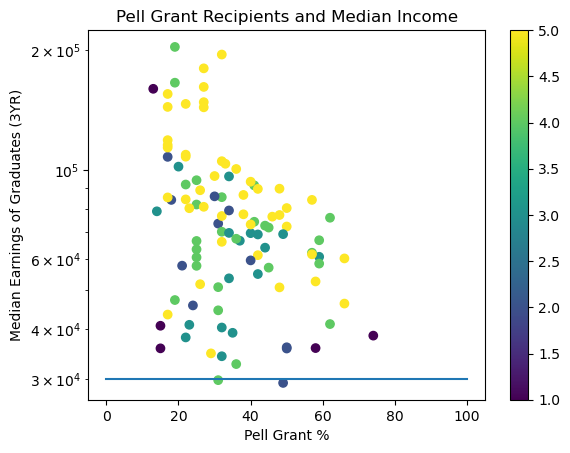

In [45]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [46]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AK', 'CA', 'HI', 'NV', 'OR', 'WA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

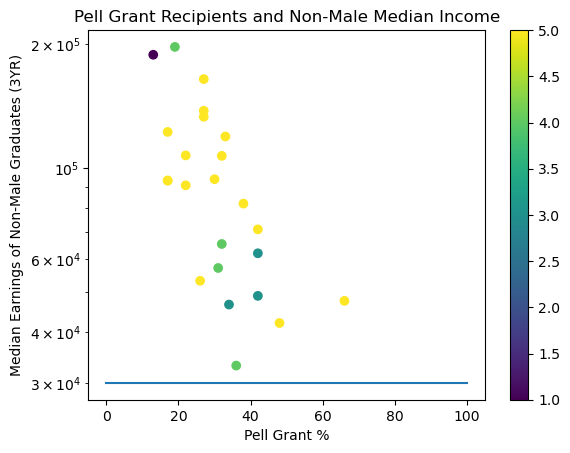

In [47]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [48]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AK', 'CA', 'HI', 'NV', 'OR', 'WA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

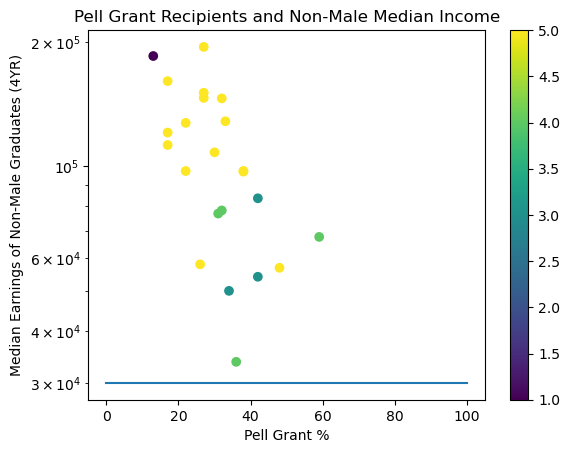

In [49]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## MidEast

In [50]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

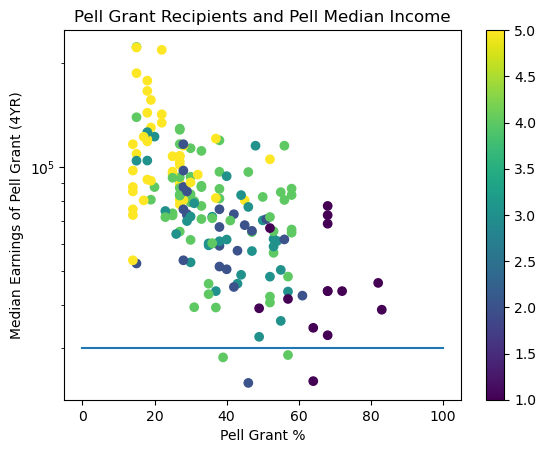

In [51]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [52]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

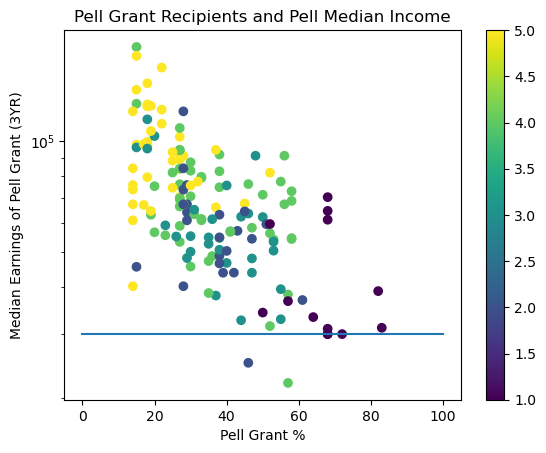

In [53]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [54]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

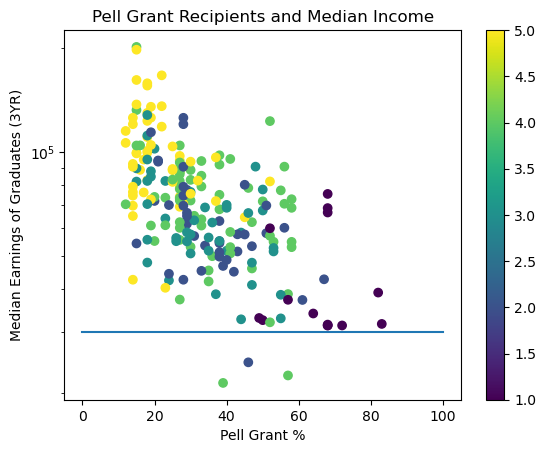

In [55]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [56]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

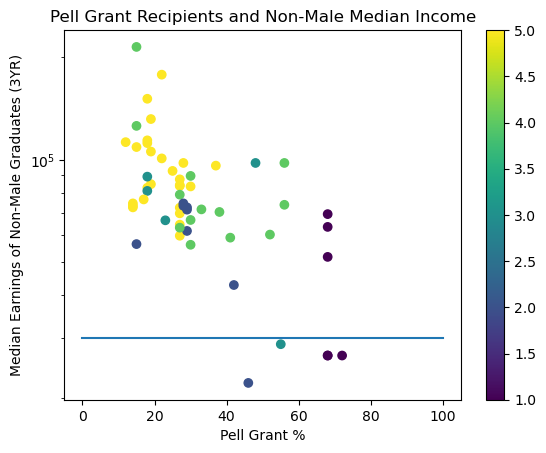

In [57]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [58]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['DE', 'DC', 'MD', 'NJ', 'NY', 'PA']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

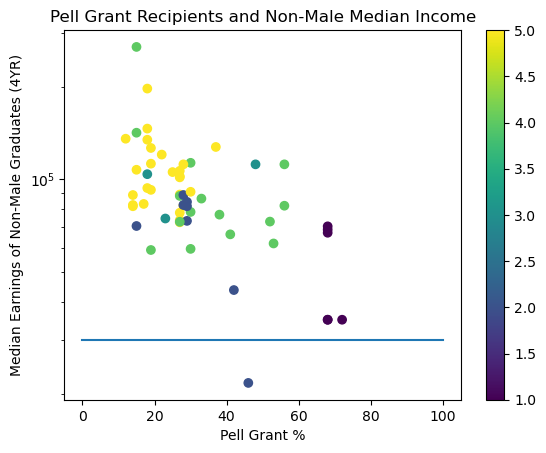

In [59]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Great Lakes

In [60]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IL', 'IN', 'MI', 'OH', 'WI']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

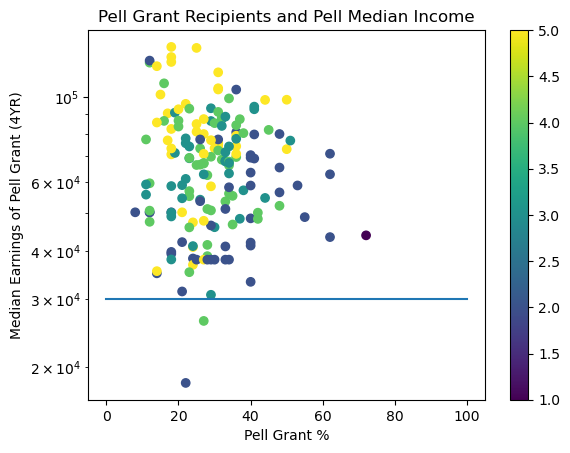

In [61]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [62]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IL', 'IN', 'MI', 'OH', 'WI']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

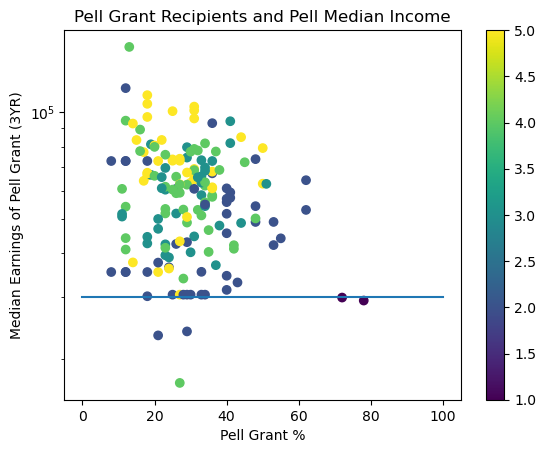

In [63]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [64]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IL', 'IN', 'MI', 'OH', 'WI']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

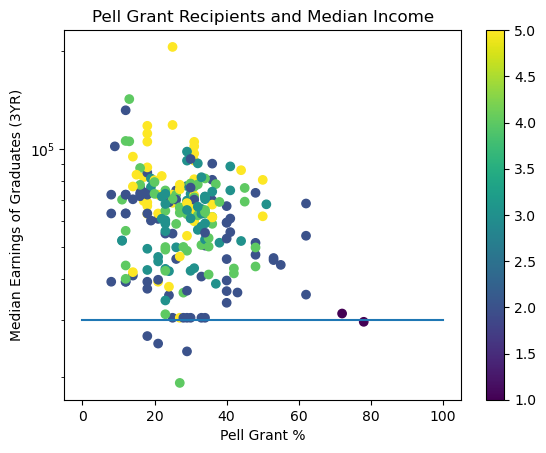

In [65]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [66]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IL', 'IN', 'MI', 'OH', 'WI']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

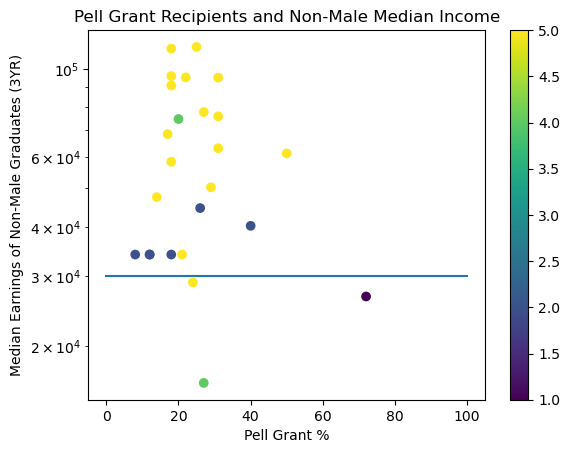

In [67]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [68]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IL', 'IN', 'MI', 'OH', 'WI']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

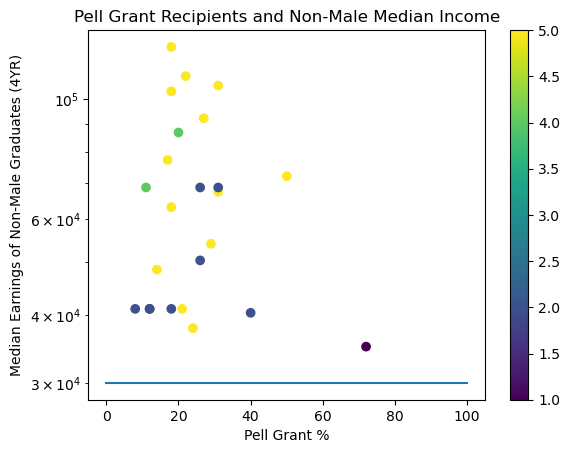

In [69]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Southwest

In [70]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AZ', 'NM', 'OK', 'TX']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

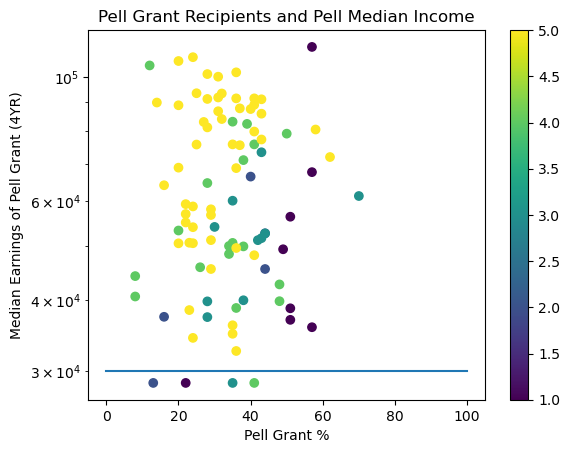

In [71]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [72]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AZ', 'NM', 'OK', 'TX']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

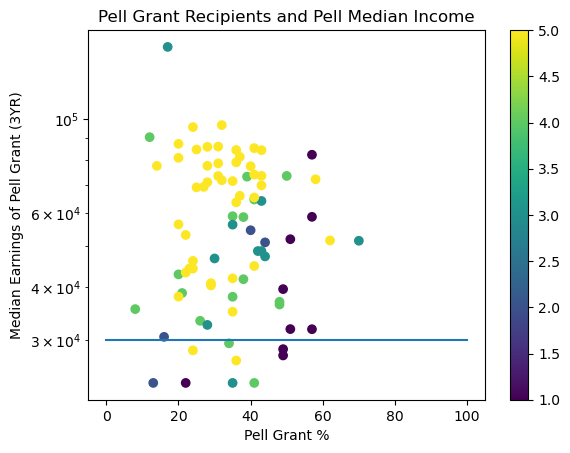

In [73]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [74]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AZ', 'NM', 'OK', 'TX']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

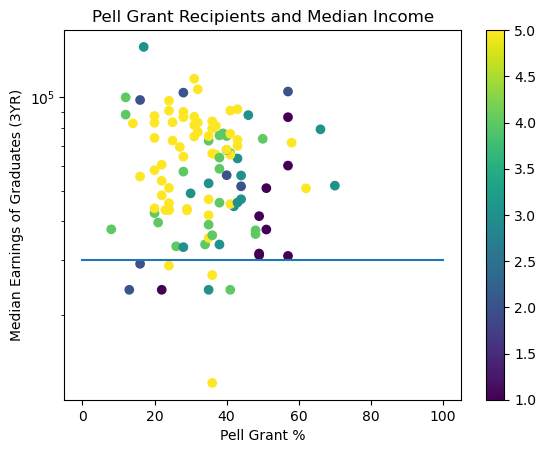

In [75]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [76]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AZ', 'NM', 'OK', 'TX']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

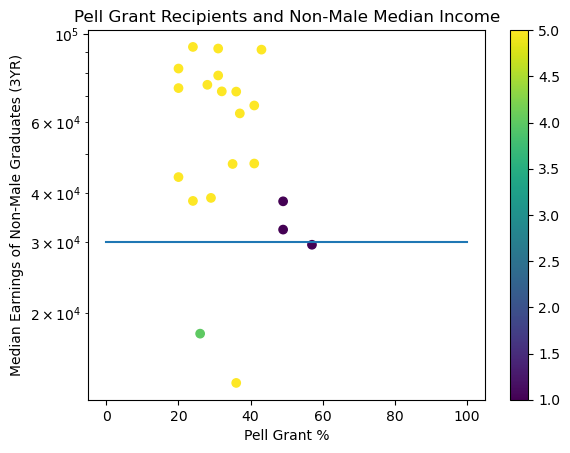

In [77]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [78]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['AZ', 'NM', 'OK', 'TX']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

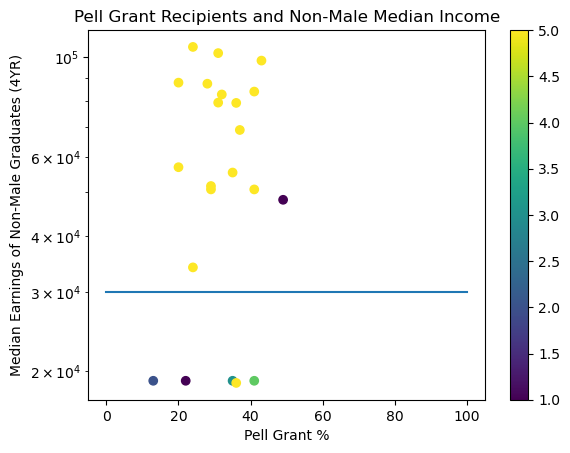

In [79]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Plains

In [80]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

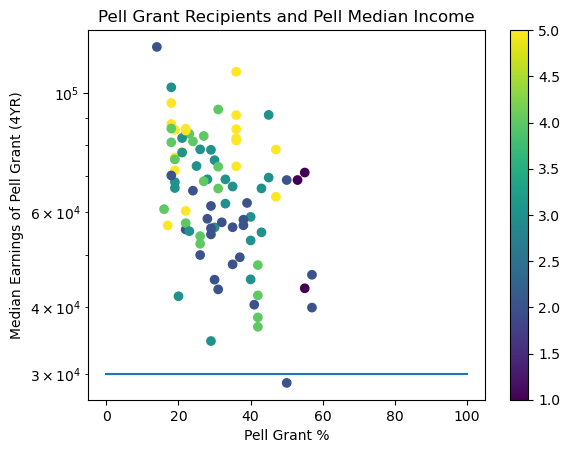

In [81]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [82]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

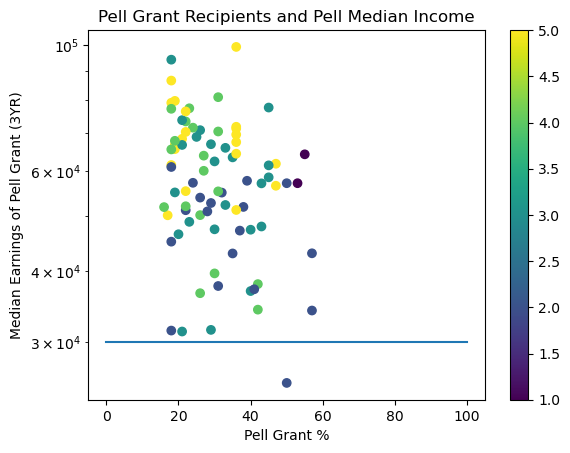

In [83]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [84]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

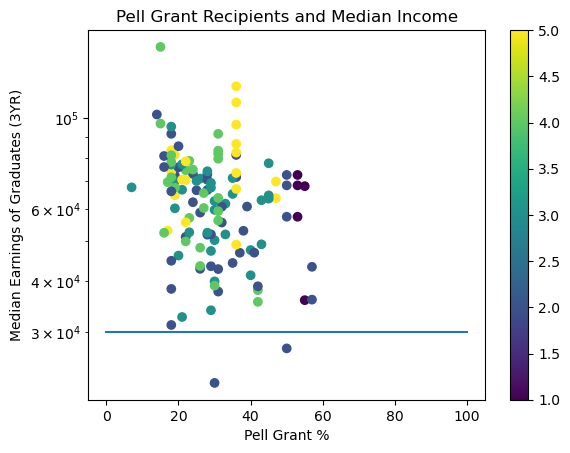

In [85]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [86]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

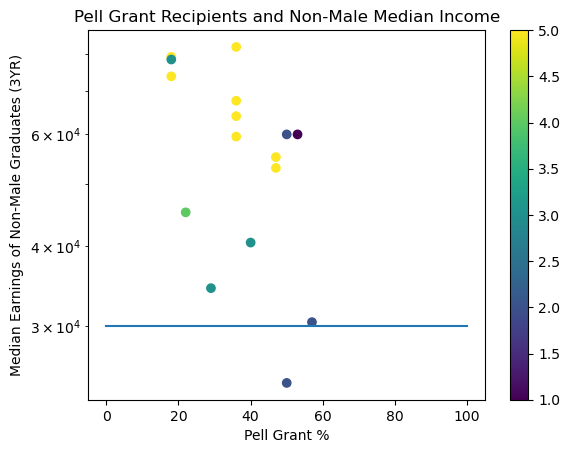

In [87]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [88]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

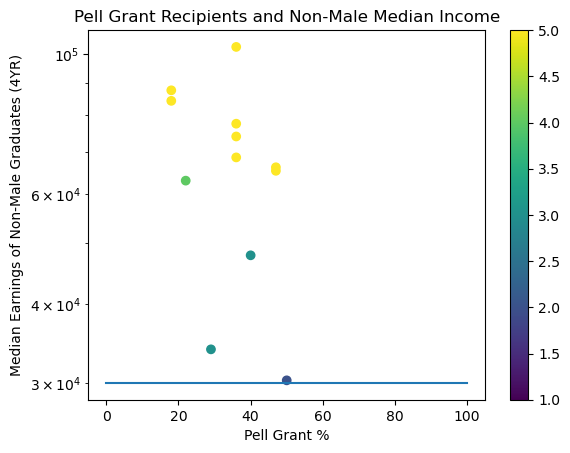

In [89]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## New England

In [90]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CT', 'ME', 'MA', 'NH', 'RI', 'VT']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

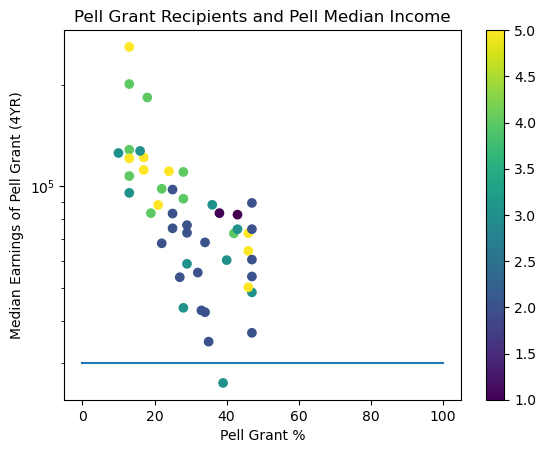

In [91]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [92]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CT', 'ME', 'MA', 'NH', 'RI', 'VT']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

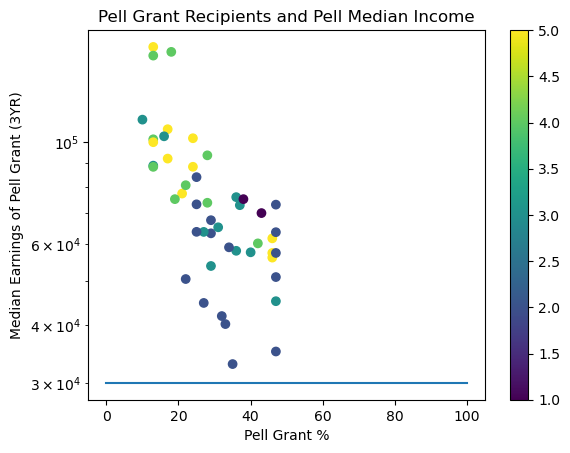

In [93]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [94]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CT', 'ME', 'MA', 'NH', 'RI', 'VT']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

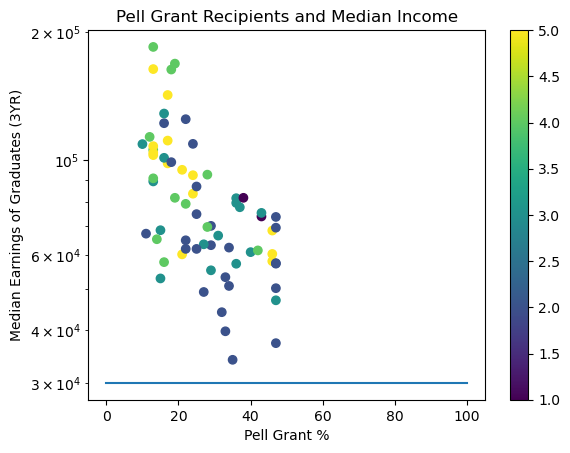

In [95]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [96]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CT', 'ME', 'MA', 'NH', 'RI', 'VT']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

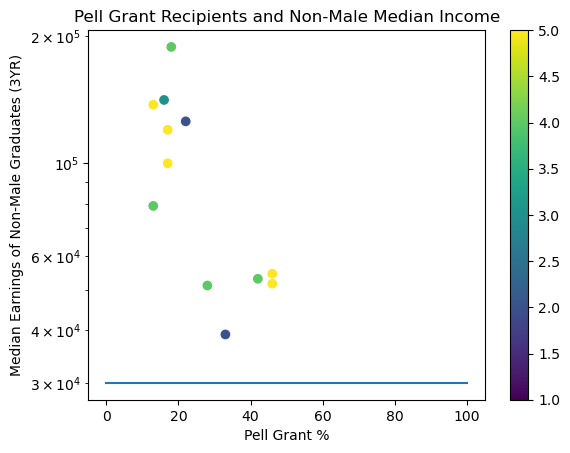

In [97]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [98]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CT', 'ME', 'MA', 'NH', 'RI', 'VT']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

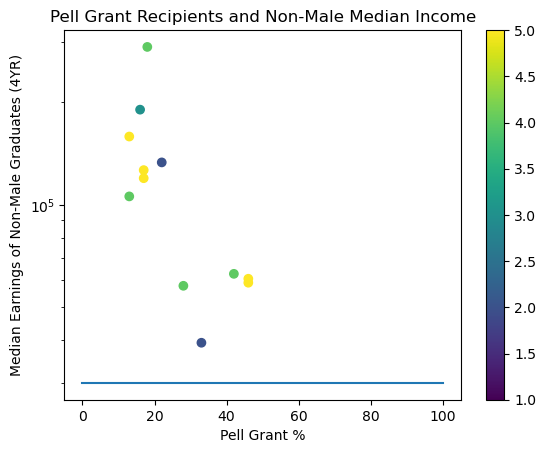

In [99]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

## Rocky Mountains

In [100]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CO', 'ID', 'MT', 'UT', 'WY']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

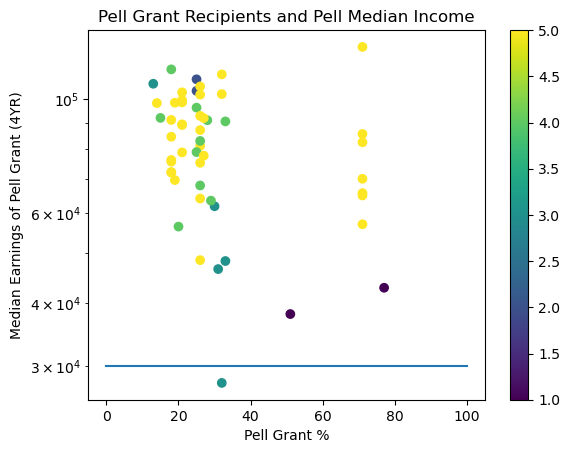

In [101]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [102]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CO', 'ID', 'MT', 'UT', 'WY']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

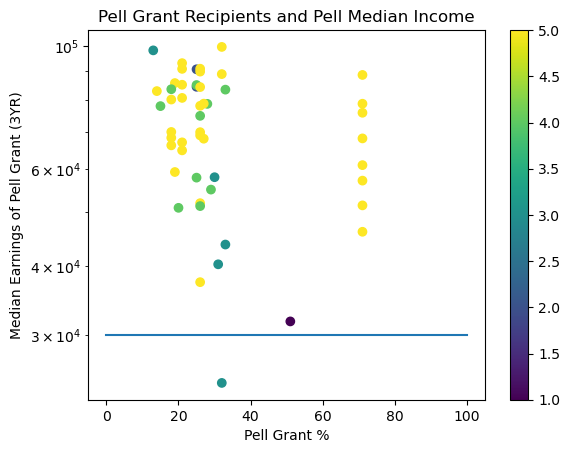

In [103]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (3YR)')
plt.title('Pell Grant Recipients and Pell Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [104]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CO', 'ID', 'MT', 'UT', 'WY']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

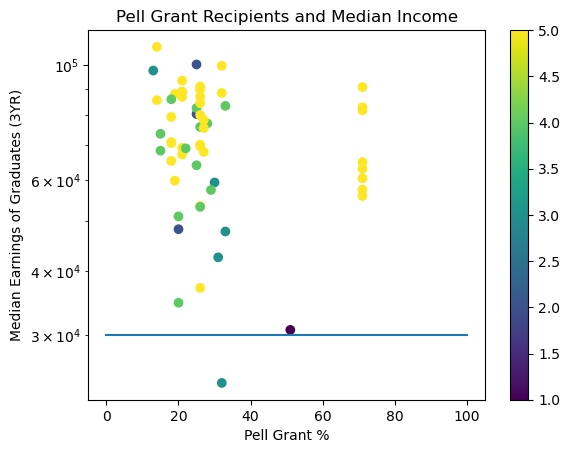

In [105]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [106]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CO', 'ID', 'MT', 'UT', 'WY']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

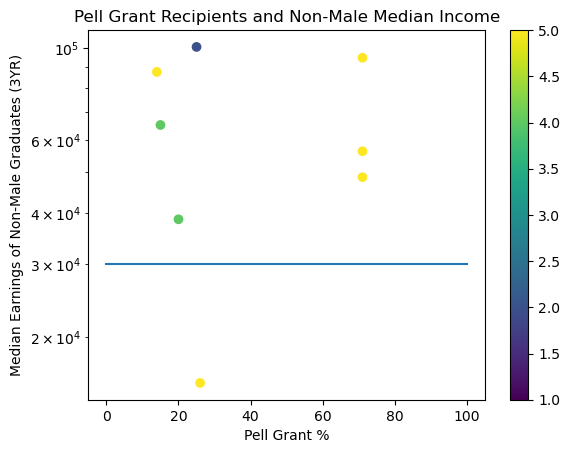

In [107]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [108]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11')) & (merged_2['STABBR'].isin(['CO', 'ID', 'MT', 'UT', 'WY']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

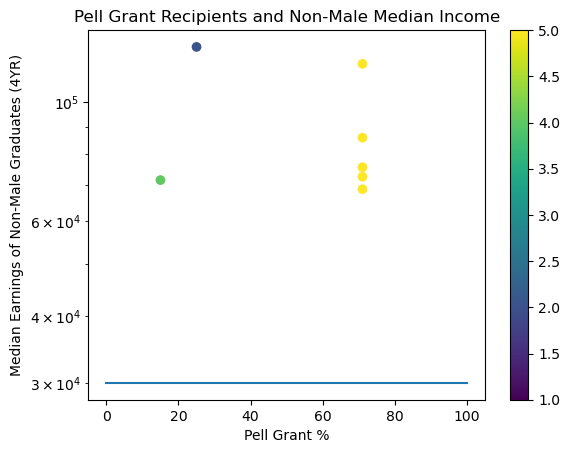

In [109]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.title('Pell Grant Recipients and Non-Male Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

### Pell Grant vs INSTSIZE AND CARNEGIE

In [110]:
merged_2.groupby('INSTSIZE')['UPGRNTP'].mean()

INSTSIZE
1    44.712306
2    32.394549
3    30.889673
4    28.165402
5    26.913585
Name: UPGRNTP, dtype: float64

In [111]:
merged_2.groupby('CARNEGIE')['UPGRNTP'].mean().sort_values()

CARNEGIE
15    22.984024
31    27.745283
52    28.971897
56    29.102639
16    30.398483
40    31.088521
53    31.450915
22    32.509662
54    33.020029
21    35.018732
59    35.784200
32    38.305307
55    38.398671
51    39.955882
33    43.023952
60    44.832924
58    44.858156
Name: UPGRNTP, dtype: float64

### Income (CS vs Non-CS)

In [112]:
merged_2['cs'] = condition
filtered = merged_2[merged_2['EARN_PELL_WNE_MDN_4YR'].apply(lambda x: x.isnumeric())]
filtered['EARN_PELL_WNE_MDN_4YR'] = filtered['EARN_PELL_WNE_MDN_4YR'].astype(float)
filtered.groupby('cs')['EARN_PELL_WNE_MDN_4YR'].mean()

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_22832/148312354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['EARN_PELL_WNE_MDN_4YR'] = filtered['EARN_PELL_WNE_MDN_4YR'].astype(float)


cs
False    53775.519372
True     81312.377358
Name: EARN_PELL_WNE_MDN_4YR, dtype: float64

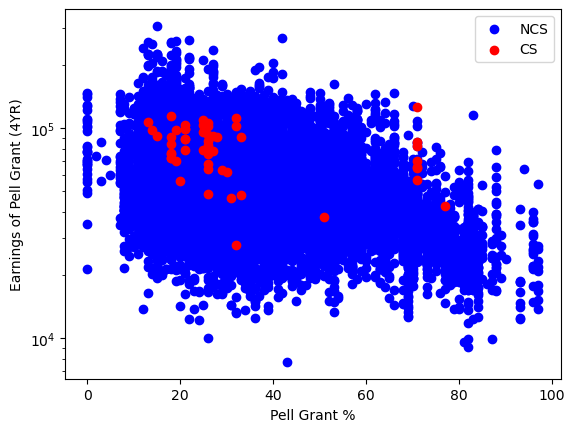

In [113]:
from matplotlib import pyplot as plt

cs = filtered[filtered['cs']]
ncs = filtered[~filtered['cs']]

x_axis = ncs['UPGRNTP']
y_axis = ncs['EARN_PELL_WNE_MDN_4YR'].replace('PS', 99999).astype(int)
plt.scatter(x_axis, y_axis, c = 'Blue', label='NCS')

x_axis = cs['UPGRNTP']
y_axis = cs['EARN_PELL_WNE_MDN_4YR'].replace('PS', 99999).astype(int)
plt.scatter(x_axis, y_axis, c = 'Red', label='CS')

plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (4YR)')
plt.yscale('log')
plt.legend()

In [114]:
condition = merged_2['EARN_COUNT_PELL_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
pell_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_NOPELL_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
no_pell_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_PELL_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
pell_non_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_NOPELL_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
no_pell_non_cs = merged_2[condition]

In [115]:
pell_cs['Pell'] = True
pell_cs['Count'] = pell_cs['EARN_COUNT_PELL_WNE_4YR']
pell_cs['CS'] = True

pell_non_cs['Pell'] = True 
pell_non_cs['Count'] = pell_non_cs['EARN_COUNT_PELL_WNE_4YR']
pell_non_cs['CS'] = False

no_pell_non_cs['Pell'] = False 
no_pell_non_cs['Count'] = no_pell_non_cs['EARN_COUNT_NOPELL_WNE_4YR']
no_pell_non_cs['CS'] = False

no_pell_cs['Pell'] = False
no_pell_cs['Count'] = no_pell_cs['EARN_COUNT_NOPELL_WNE_4YR']
no_pell_cs['CS'] = True

all_data = pd.concat([pell_cs, no_pell_cs, no_pell_non_cs, pell_non_cs])

all_data = all_data[all_data['Count'] != "PS"]

all_data['Count'] = all_data['Count'].astype(int)

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_22832/3256430990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell_cs['Pell'] = True
/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_22832/3256430990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell_cs['Count'] = pell_cs['EARN_COUNT_PELL_WNE_4YR']
/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_22832/3256430990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [116]:
all_cs['Count'] = all_cs['Count'].astype(int)

NameError: name 'all_cs' is not defined

[Text(0.5, 1.0, 'Popularity of CS vs Non-CS for Pell & Non-Pell Graduates')]

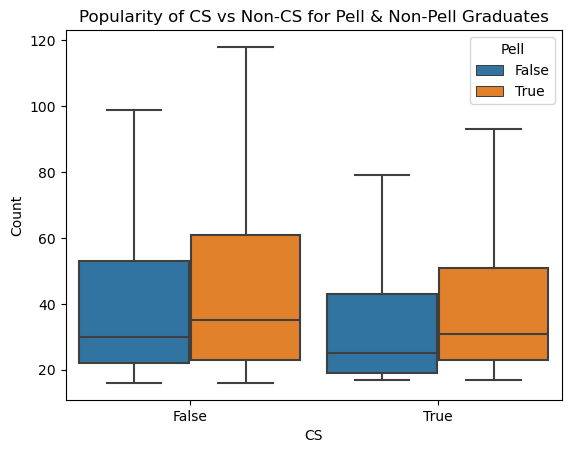

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.boxplot(data = all_data, x = 'CS', y ="Count", hue="Pell", width=0.9, showfliers=False);
ax.set(title = 'Popularity of CS vs Non-CS for Pell & Non-Pell Graduates')


In [ ]:
condition = merged_2['EARN_COUNT_MALE_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
male_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_NOMALE_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
nomale_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_MALE_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
male_non_cs = merged_2[condition]
condition = merged_2['EARN_COUNT_NOMALE_WNE_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
nomale_non_cs = merged_2[condition]

In [ ]:
male_cs['CS'] = True
male_cs['Income'] = male_cs['EARN_MALE_WNE_MDN_4YR']
male_cs['Male'] = True

nomale_cs['CS'] = True
nomale_cs['Income'] = nomale_cs['EARN_NOMALE_WNE_MDN_4YR']
nomale_cs['Male'] = False

male_non_cs['CS'] = False
male_non_cs['Income'] = male_non_cs['EARN_MALE_WNE_MDN_4YR']
male_non_cs['Male'] = True

nomale_non_cs['CS'] = False
nomale_non_cs['Income'] = nomale_non_cs['EARN_NOMALE_WNE_MDN_4YR']
nomale_non_cs['Male'] = False

male_data = pd.concat([male_cs, male_non_cs])
non_male_data = pd.concat([nomale_cs, nomale_non_cs])
all_gender_data = pd.concat([male_cs, male_non_cs, nomale_cs, nomale_non_cs])

male_data = male_data[male_data['Income'] != "PS"]
non_male_data = non_male_data[non_male_data['Income'] != "PS"]
all_gender_data = all_gender_data[all_gender_data['Count'] != "PS"]

male_data['Income'] = male_data['Income'].astype(int)
non_male_data['Income'] = non_male_data['Income'].astype(int)
all_gender_data['Income'] = all_gender_data['Income'].astype(int)

/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_10555/972129555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cs['CS'] = True
/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_10555/972129555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cs['Income'] = male_cs['EARN_MALE_WNE_MDN_4YR']
/var/folders/_g/bhxqyzfn3tl8bx13c4flvydr0000gn/T/ipykernel_10555/972129555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

[Text(0.5, 1.0, 'Earnings of CS in Males')]

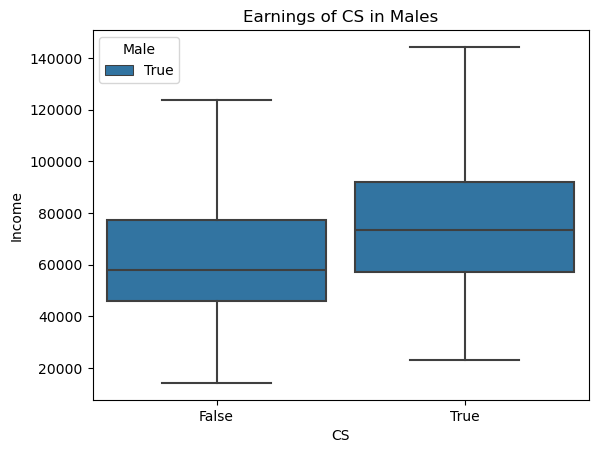

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.boxplot(data = male_data, x = 'CS', y ="Income", hue="Male", width=0.9, showfliers=False);
ax.set(title = 'Earnings of CS in Males')

[Text(0.5, 1.0, 'Earnings of CS in Non-Males')]

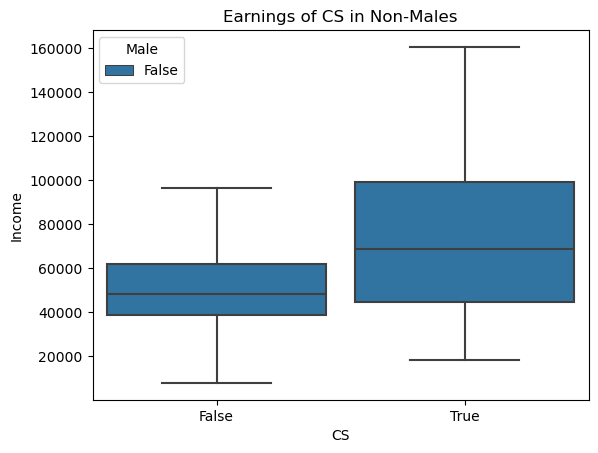

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.boxplot(data = non_male_data, x = 'CS', y ="Income", hue="Male", width=0.9, showfliers=False);
ax.set(title = 'Earnings of CS in Non-Males')

[Text(0.5, 1.0, ' Earnings of Males and Non-Males')]

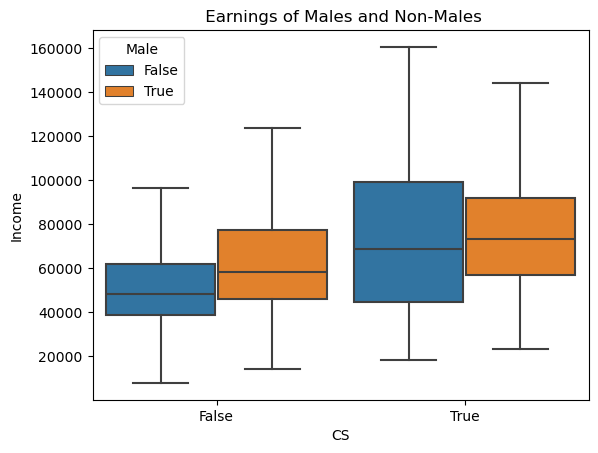

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.boxplot(data = all_gender_data, x = 'CS', y ="Income", hue="Male", width=0.9, showfliers=False);
ax.set(title = ' Earnings of Males and Non-Males')

In [7]:
merged_2

,UNITID,XSCUGRAD,SCUGRAD,XSCUGDGSK,SCUGDGSK,XSCUGNDGS,SCUGNDGS,XSCUGFFN,SCUGFFN,XSCUGFFP,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654,R,5107,R,5094,R,13,R,1417,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1,100654,R,5107,R,5094,R,13,R,1417,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
2,100654,R,5107,R,5094,R,13,R,1417,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
3,100654,R,5107,R,5094,R,13,R,1417,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
4,100654,R,5107,R,5094,R,13,R,1417,R,...,12,PS,PS,PS,PS,PS,PS,PS,PS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213939,490805,R,8044,R,6396,R,1648,R,1040,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
213940,490805,R,8044,R,6396,R,1648,R,1040,R,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
213941,490805,R,8044,R,6396,R,1648,R,1040,R,...,62,<=0.20,<=0.20,0.60 - 0.79,<=0.20,<=0.20,<=0.20,<=0.20,<=0.20,0
213942,490805,R,8044,R,6396,R,1648,R,1040,R,...,21,PS,PS,PS,PS,PS,PS,PS,PS,1


In [57]:
cs_condition =  merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

pell_cs_4yr         = merged_2[cs_condition][['EARN_PELL_WNE_MDN_4YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_cs_4yr      = merged_2[cs_condition][['EARN_NOPELL_WNE_MDN_4YR']]#.replace('PS', 0).fillna(0).astype(int)
pell_non_cs_4yr     = merged_2[~cs_condition][['EARN_PELL_WNE_MDN_4YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_non_cs_4yr  = merged_2[~cs_condition][['EARN_NOPELL_WNE_MDN_4YR']]#.replace('PS', 0).fillna(0).astype(int)
pell_cs_3yr         = merged_2[cs_condition][['EARN_PELL_NE_MDN_3YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_cs_3yr      = merged_2[cs_condition][['EARN_NOPELL_NE_MDN_3YR']]#.replace('PS', 0).fillna(0).astype(int)
pell_non_cs_3yr     = merged_2[cs_condition][['EARN_PELL_NE_MDN_3YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_non_cs_3yr  = merged_2[~cs_condition][['EARN_NOPELL_NE_MDN_3YR']]#.replace('PS', 0).fillna(0).astype(int)
pell_cs_1yr         = merged_2[cs_condition][['EARN_PELL_WNE_MDN_1YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_cs_1yr      = merged_2[cs_condition][['EARN_NOPELL_WNE_MDN_1YR']]#.replace('PS', 0).fillna(0).astype(int)
pell_non_cs_1yr     = merged_2[~cs_condition][['EARN_PELL_WNE_MDN_1YR']]#.replace('PS', 0).fillna(0).astype(int)
no_pell_non_cs_1yr  = merged_2[~cs_condition][['EARN_NOPELL_WNE_MDN_1YR']]#.replace('PS', 0).fillna(0).astype(int)


In [2]:
# condition = merged_2['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_cs_4yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_cs_4yr = merged_2[condition]

# condition = merged_2['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_non_cs_4yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_non_cs_4yr = merged_2[condition]

# condition = merged_2['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_cs_3yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_cs_3yr = merged_2[condition]

# condition = merged_2['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_non_cs_3yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_non_cs_3yr = merged_2[condition]

# condition = merged_2['EARN_PELL_WNE_MDN_1YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_cs_1yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_WNE_MDN_1YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_cs_1yr = merged_2[condition]

# condition = merged_2['EARN_PELL_WNE_MDN_1YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# pell_non_cs_1yr = merged_2[condition]

# condition = merged_2['EARN_NOPELL_WNE_MDN_1YR'].replace('PS', 0).fillna(0).astype(int) & merged_2['CIPCODE'] != merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
# no_pell_non_cs_1yr = merged_2[condition]


In [58]:
pell_cs_4yr['CS'] = True
pell_cs_4yr['Pell'] = True
pell_cs_4yr['Years'] = 4
pell_cs_4yr.rename(columns={'EARN_PELL_WNE_MDN_4YR': 'Income'}, inplace=True)

no_pell_cs_4yr['CS'] = True
no_pell_cs_4yr['Pell'] = False
# no_pell_cs_4yr['Income'] = no_pell_cs_4yr['EARN_NOPELL_WNE_MDN_4YR']
no_pell_cs_4yr['Years'] = 4
no_pell_cs_4yr.rename(columns={'EARN_NOPELL_WNE_MDN_4YR': 'Income'}, inplace=True)

pell_non_cs_4yr['CS'] = False
pell_non_cs_4yr['Pell'] = True
# pell_non_cs_4yr['Income'] = pell_non_cs_4yr['EARN_PELL_WNE_MDN_4YR']
pell_non_cs_4yr['Years'] = 4
pell_non_cs_4yr.rename(columns={'EARN_PELL_WNE_MDN_4YR': 'Income'}, inplace=True)

no_pell_non_cs_4yr['CS'] = False
no_pell_non_cs_4yr['Pell'] = False
# no_pell_non_cs_4yr['Income'] = no_pell_non_cs_4yr['EARN_NOPELL_WNE_MDN_4YR']
no_pell_non_cs_4yr['Years'] = 4
no_pell_non_cs_4yr.rename(columns={'EARN_NOPELL_WNE_MDN_4YR': 'Income'}, inplace=True)

pell_cs_3yr['CS'] = True
pell_cs_3yr['Pell'] = True
# pell_cs_3yr['Income'] = pell_cs_3yr['EARN_PELL_NE_MDN_3YR']
pell_cs_3yr['Years'] = 3
pell_cs_3yr.rename(columns={'EARN_PELL_NE_MDN_3YR': 'Income'}, inplace=True)

no_pell_cs_3yr['CS'] = True
no_pell_cs_3yr['Pell'] = False
# no_pell_cs_3yr['Income'] = no_pell_cs_3yr['EARN_NOPELL_NE_MDN_3YR']
no_pell_cs_3yr['Years'] = 3
no_pell_cs_3yr.rename(columns={'EARN_NOPELL_NE_MDN_3YR': 'Income'}, inplace=True)

pell_non_cs_3yr['CS'] = False
pell_non_cs_3yr['Pell'] = True
# pell_non_cs_3yr['Income'] = pell_non_cs_3yr['EARN_PELL_NE_MDN_3YR']
pell_non_cs_3yr['Years'] = 3
pell_non_cs_3yr.rename(columns={'EARN_PELL_NE_MDN_3YR': 'Income'}, inplace=True)

no_pell_non_cs_3yr['CS'] = False
no_pell_non_cs_3yr['Pell'] = False
# no_pell_non_cs_3yr['Income'] = no_pell_non_cs_3yr['EARN_NOPELL_NE_MDN_3YR']
no_pell_non_cs_3yr['Years'] = 3
no_pell_non_cs_3yr.rename(columns={'EARN_NOPELL_NE_MDN_3YR': 'Income'}, inplace=True)

pell_cs_1yr['CS'] = True
pell_cs_1yr['Pell'] = True
# pell_cs_1yr['Income'] = pell_cs_1yr['EARN_PELL_WNE_MDN_1YR']
pell_cs_1yr['Years'] = 1
pell_cs_1yr.rename(columns={'EARN_PELL_WNE_MDN_1YR': 'Income'}, inplace=True)

no_pell_cs_1yr['CS'] = True
no_pell_cs_1yr['Pell'] = False
# no_pell_cs_1yr['Income'] = no_pell_cs_1yr['EARN_NOPELL_WNE_MDN_1YR']
no_pell_cs_1yr['Years'] = 1
no_pell_cs_1yr.rename(columns={'EARN_NOPELL_WNE_MDN_1YR': 'Income'}, inplace=True)

pell_non_cs_1yr['CS'] = False
pell_non_cs_1yr['Pell'] = True
# pell_non_cs_1yr['Income'] = pell_non_cs_1yr['EARN_PELL_WNE_MDN_1YR']
pell_non_cs_1yr['Years'] = 1
pell_non_cs_1yr.rename(columns={'EARN_PELL_WNE_MDN_1YR': 'Income'}, inplace=True)

no_pell_non_cs_1yr['CS'] = False
no_pell_non_cs_1yr['Pell'] = False
# no_pell_non_cs_1yr['Income'] = no_pell_non_cs_1yr['EARN_NOPELL_WNE_MDN_1YR']
no_pell_non_cs_1yr['Years'] = 1
no_pell_non_cs_1yr.rename(columns={'EARN_NOPELL_WNE_MDN_1YR': 'Income'}, inplace=True)

all_year_data = pd.concat([pell_cs_4yr, no_pell_cs_4yr, pell_non_cs_4yr, no_pell_non_cs_4yr, pell_cs_3yr, \
                           no_pell_cs_3yr, pell_non_cs_3yr, no_pell_non_cs_3yr, pell_cs_1yr, no_pell_cs_1yr, \
                            pell_non_cs_1yr, no_pell_non_cs_1yr])


In [59]:
all_year_data = all_year_data[all_year_data['Income'] != "PS"]
all_year_data['Income'] = all_year_data['Income'].fillna(0).astype(int)

In [63]:
no_pell_and_cs

Years
1    70476.0
3        0.0
4    92083.0
Name: Income, dtype: float64

In [61]:
pell_and_cs = all_year_data[(all_year_data['CS'] == True) & (all_year_data['Pell'] == True)]
pell_and_cs = pell_and_cs.groupby('Years')['Income'].median()

no_pell_and_cs = all_year_data[(all_year_data['CS'] == True) & (all_year_data['Pell'] == False)].groupby('Years')['Income'].median()
pell_and_non_cs = all_year_data[(all_year_data['CS'] == False) & (all_year_data['Pell'] == True)].groupby('Years')['Income'].median()
no_pell_and_non_cs = all_year_data[(all_year_data['CS'] == False) & (all_year_data['Pell'] == False)].groupby('Years')['Income'].median()

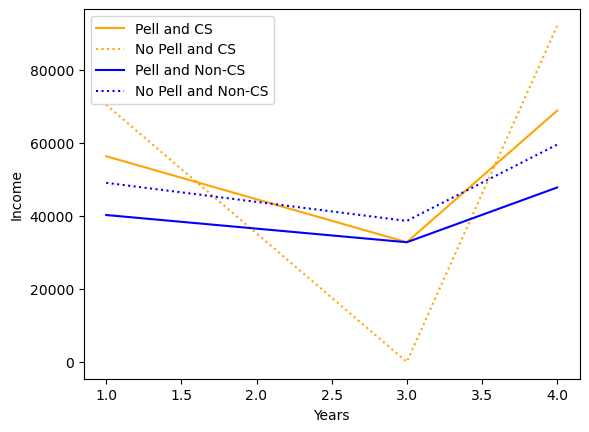

In [62]:
from matplotlib import pyplot as plt
x_axis = all_year_data['Years'].unique()
plt.plot(pell_and_cs, label='Pell and CS', color='orange')
plt.plot(no_pell_and_cs, label='No Pell and CS', color='orange', linestyle=':')
plt.plot(pell_and_non_cs, label='Pell and Non-CS', color='blue')
plt.plot(no_pell_and_non_cs, label='No Pell and Non-CS', color='blue', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Income')
plt.legend()

In [155]:
no_pell_and_cs

Years
1    70223.0
3    79373.0
4    89841.0
Name: Income, dtype: float64

In [156]:
pell_and_cs

Years
1    56250.0
3    61963.0
4    65705.0
Name: Income, dtype: float64

In [157]:
pell_and_non_cs

Years
1    40630.0
3    41985.0
4    48086.5
Name: Income, dtype: float64

In [158]:
no_pell_and_non_cs

Years
1    42582.0
3    51963.0
4    60009.0
Name: Income, dtype: float64